# {Fast Food & General Nutrition Analysis}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

Many people regularly consume fast food, but nutritional information is often difficult to interpret, inconsistent across sources, or overlooked when making food choices. This creates challenges for:

Consumers → making informed dietary decisions.

Healthcare professionals → guiding patients on nutrition.

Researchers/educators → understanding how fast food compares with general food supply.

## Problem Statement

In today’s fast-paced world, many people simply don’t have the time, resources, or energy to prepare nutritious meals at home. As a result, they frequently turn to convenient fast-food options — but these options vary dramatically in their nutritional quality. Consumers who want to eat healthier often lack clear, data-driven guidance on which foods (home-cooked or fast-food) offer the best nutritional value for their time and budget constraints.

This project aims to analyze and compare nutritional profiles across everyday foods and popular fast-food items in order to answer a key question:

> **“When people are busy, what are the healthiest options available — both at home and at fast-food restaurants — and how can data help them make better decisions quickly?”**

To accomplish this, the project will:

- Analyze nutrient density across a dataset of everyday foods.
- Integrate a second dataset containing fast-food nutritional information.
- Compare foods using metrics such as **protein-to-calorie ratio**, **sugar load**, **sodium density**, and **overall nutrient quality**.
- Build machine-learning models to classify foods as **“healthy,” “moderate,” or “unhealthy”** based on nutrient composition.
- Provide visual comparisons that highlight the best choices for **cooking at home** and for **ordering fast food** when time is limited.

The goal is to empower individuals with **simple, evidence-based insights** that support healthier eating habits — even when life gets busy and cooking isn’t always possible.


## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

What is the nutritional difference between fast food menu items and general food items, and how do these values compare against authoritative USDA standards?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

the answer could look like a summary table, a bar chart showing averages, boxplots with sugar per content or a scatter plot of protein vs calories.  

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

Kaggle Dataset (CSV) — Fast Food Nutrition Dataset

https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition

Contains nutrition facts for menu items from popular fast food restaurants (calories, fat, protein, etc.)

Kaggle Dataset (CSV) — Nutritional Content of Food

https://www.kaggle.com/datasets/thedevastator/the-nutritional-content-of-food-a-comprehensive

Comprehensive dataset of nutrition facts for thousands of foods from various categories, not limited to fast food.

USDA FoodData Central API — FoodData Central

https://fdc.nal.usda.gov/

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

In [2]:
# 1. Import and cleaning data
# Load the Kaggle Fast Food Nutrition dataset and General Nutrition dataset into pandas dataframes.

import pandas as pd

fast_food_df = pd.read_csv("datasets\\fastfood.csv")
general_nutrition_df = pd.read_csv("datasets\\food_nutrition.csv")

# 2. Data Cleaning
# Standardize column names and units (e.g., calories, grams of fat, sugar, protein).
# Handle missing values and normalize food names for easier comparison.

# 3. USDA API Integration
# Use the USDA FoodData Central API to fetch official nutrition facts
# for selected overlapping items (e.g., "cheeseburger", "chicken sandwich", "salad").
# Align these values with Kaggle datasets to check consistency and accuracy.

# 4. Data Merging
# Create a combined dataset where each food item has:
# - Source (Fast Food, General Food, USDA)
# - Calories, fat, sugar, protein, sodium
# Use food names as keys for merging (after text cleaning/matching).

# 5. Exploratory Data Analysis (EDA)
# - Summary statistics (mean, median, std deviation) for each nutrient by category
# - Comparisons: Fast food vs general food vs USDA benchmarks
# - Visualization: bar charts, boxplots, scatterplots, heatmaps

# 6. Answering the Question
# Quantitatively: Compare calories/fat/sugar across datasets
# Qualitatively: Show how USDA data validates or contradicts Kaggle datasets


In [3]:
### 1. Import Libraries and Load Data


# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [4]:
# Load the datasets
fast_food_df = pd.read_csv("datasets\\fastfood.csv")
general_nutrition_df = pd.read_csv("datasets\\food_nutrition.csv")

print("✅ Datasets loaded successfully!")
print(f"Fast Food Dataset: {fast_food_df.shape[0]} rows × {fast_food_df.shape[1]} columns")
print(f"General Nutrition Dataset: {general_nutrition_df.shape[0]} rows × {general_nutrition_df.shape[1]} columns")

✅ Datasets loaded successfully!
Fast Food Dataset: 515 rows × 17 columns
General Nutrition Dataset: 8790 rows × 54 columns


In [5]:
# Explore Fast Food Dataset structure
print("Fast Food Dataset Overview:")
print("="*50)
print("\nFirst 5 rows:")
display(fast_food_df.head())
print("\nData types:")
print(fast_food_df.dtypes)
print("\nBasic statistics:")
display(fast_food_df.describe().round(2))

Fast Food Dataset Overview:

First 5 rows:


,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other



Data types:
restaurant      object
item            object
calories         int64
cal_fat          int64
total_fat        int64
sat_fat        float64
trans_fat      float64
cholesterol      int64
sodium           int64
total_carb       int64
fiber          float64
sugar            int64
protein        float64
vit_a          float64
vit_c          float64
calcium        float64
salad           object
dtype: object

Basic statistics:


,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.00,515.00,515.00,515.00,515.00,515.00,515.00,515.00,503.00,515.00,514.00,301.00,305.00,305.00
mean,530.91,238.81,26.59,8.15,0.47,72.46,1246.74,45.66,4.14,7.26,27.89,18.86,20.17,24.85
std,282.44,166.41,18.41,6.42,0.84,63.16,689.95,24.88,3.04,6.76,17.68,31.38,30.59,25.52
min,20.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,330.00,120.00,14.00,4.00,0.00,35.00,800.00,28.50,2.00,3.00,16.00,4.00,4.00,8.00
50%,490.00,210.00,23.00,7.00,0.00,60.00,1110.00,44.00,3.00,6.00,24.50,10.00,10.00,20.00
75%,690.00,310.00,35.00,11.00,1.00,95.00,1550.00,57.00,5.00,9.00,36.00,20.00,30.00,30.00
max,2430.00,1270.00,141.00,47.00,8.00,805.00,6080.00,156.00,17.00,87.00,186.00,180.00,400.00,290.00


In [6]:
# Explore General Nutrition Dataset structure
print("General Nutrition Dataset Overview:")
print("="*50)
print("\nFirst 5 rows:")
display(general_nutrition_df.head())
print("\nColumn names:")
print(list(general_nutrition_df.columns)[:20])  # Show first 20 columns
print(f"\n... and {len(general_nutrition_df.columns)-20} more columns")
print(f"\nTotal shape: {general_nutrition_df.shape[0]} rows × {general_nutrition_df.shape[1]} columns")

General Nutrition Dataset Overview:

First 5 rows:


,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0



Column names:
['index', 'NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)']

... and 34 more columns

Total shape: 8790 rows × 54 columns


missing values analysis for Fast Food Dataset:

Columns with missing values:
  vit_a: 214 missing (41.6%)
  calcium: 210 missing (40.8%)
  vit_c: 210 missing (40.8%)
  fiber: 12 missing (2.3%)
  protein: 1 missing (0.2%)


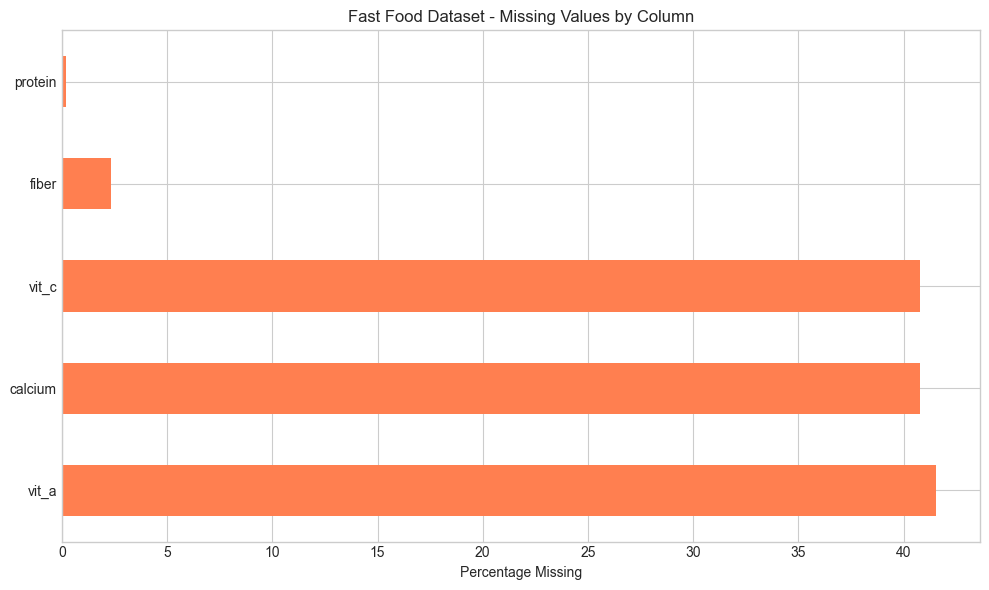

In [7]:
# Analyze missing values in Fast Food dataset
print("missing values analysis for Fast Food Dataset:")
print("="*50)

ff_missing = fast_food_df.isnull().sum()
ff_missing_pct = (ff_missing / len(fast_food_df)) * 100

# Display columns with missing values
missing_cols = ff_missing_pct[ff_missing_pct > 0].sort_values(ascending=False)
if len(missing_cols) > 0:

    # Print columns with missing values
    print("\nColumns with missing values:")
    
    for col, pct in missing_cols.items():
        print(f"  {col}: {ff_missing[col]} missing ({pct:.1f}%)")
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    missing_cols.plot(kind='barh', color='coral')
    plt.xlabel('Percentage Missing')
    plt.title('Fast Food Dataset - Missing Values by Column')
    plt.tight_layout()
    plt.show()

else:
    print("No missing values found!")



In [8]:

# Analyze missing values in General Nutrition dataset
print("missing values analysis for General Nutrition Dataset:")
print("="*50)

gn_missing = general_nutrition_df.isnull().sum() # sum of null values per column
gn_missing_pct = (gn_missing / len(general_nutrition_df)) * 100

# Display columns with >30% missing values
high_missing = gn_missing_pct[gn_missing_pct > 30].sort_values(ascending=False)

print(f"\nColumns with >30% missing values: {len(high_missing)}")

if len(high_missing) > 0:
    print("\nTop 10 columns with highest missing %:")
    
    # Print top 10 columns with highest missing percentage
    for col, pct in high_missing.head(10).items():
        print(f"  {col}: {pct:.1f}% missing")



missing values analysis for General Nutrition Dataset:

Columns with >30% missing values: 12

Top 10 columns with highest missing %:
  Choline_Tot_ (mg): 45.7% missing
  GmWt_2: 45.1% missing
  GmWt_Desc2: 45.1% missing
  Vit_K_(µg): 40.5% missing
  Lut+Zea_ (µg): 37.7% missing
  Lycopene_(µg): 37.5% missing
  Beta_Crypt_(µg): 37.2% missing
  Vit_D_µg: 37.1% missing
  Alpha_Carot_(µg): 37.1% missing
  Vit_D_IU: 36.5% missing


In [9]:
# Handle missing values and duplicates -DATA CLEANING
print(" Data Cleaning ")
print("="*50)

# Handle missing fiber values by imputing with restaurant median


if 'fiber' in fast_food_df.columns:
    # Count how many 'fiber' values are missing before imputation
    fiber_missing_before = fast_food_df['fiber'].isnull().sum()

    # fill in any missing values with the median of each restaurant group
    fast_food_df['fiber'] = fast_food_df.groupby('restaurant')['fiber'].transform(
        lambda x: x.fillna(x.median())
    )

     # Count missing values again after imputation
    fiber_missing_after = fast_food_df['fiber'].isnull().sum()

     # Print how many values were successfully imputed
    print(f"✓ Imputed {fiber_missing_before - fiber_missing_after} fiber values using restaurant medians")

# Remove any duplicates
ff_duplicates_before = fast_food_df.duplicated().sum()
gn_duplicates_before = general_nutrition_df.duplicated().sum()

fast_food_df = fast_food_df.drop_duplicates()
general_nutrition_df = general_nutrition_df.drop_duplicates()

# Print how many duplicates were removed
print(f"✓ Removed {ff_duplicates_before} duplicates from Fast Food dataset")
print(f"✓ Removed {gn_duplicates_before} duplicates from General Nutrition dataset")

print("\n✅ Data cleaning completed!")

 Data Cleaning 
✓ Imputed 12 fiber values using restaurant medians
✓ Removed 2 duplicates from Fast Food dataset
✓ Removed 0 duplicates from General Nutrition dataset

✅ Data cleaning completed!


In [10]:
# Generate statistical summaries
print("Statistical Summaries")
print("="*50)

# Fast Food Nutritional Statistics 
print("\n Fast Food - Key Nutritional Statistics:")
nutrition_cols = ['calories', 'total_fat', 'protein', 'sodium', 'sugar'] # specify relevant columns (Calories, Total Fat, Protein, Sodium, Sugar)
available_cols = [col for col in nutrition_cols if col in fast_food_df.columns]
display(fast_food_df[available_cols].describe().round(2)) # round to 2 decimal places

# General Nutrition Nutritional Statistics
print("\n General Food - Key Nutritional Statistics (per 100g):")
gn_nutrition_cols = ['Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Sodium_(mg)']
gn_available_cols = [col for col in gn_nutrition_cols if col in general_nutrition_df.columns]
display(general_nutrition_df[gn_available_cols].describe().round(2))

# Comparative Insights
print("\n Comparative Insights:")
print(f"  • Fast food averages {fast_food_df['calories'].mean():.0f} calories per item") # mean calories in fast food
print(f"  • General food averages {general_nutrition_df['Energ_Kcal'].mean():.0f} calories per 100g") # mean calories in general food

# Comparative calorie density
print(f"  • Fast food is approximately {fast_food_df['calories'].mean() / general_nutrition_df['Energ_Kcal'].mean():.1f} times more calorie-dense")

# Sodium comparison
print(f"  • Sodium concern: Fast food avg = {fast_food_df['sodium'].mean():.0f}mg (>50% of daily limit)")

Statistical Summaries

 Fast Food - Key Nutritional Statistics:


,calories,total_fat,protein,sodium,sugar
count,513.00,513.00,512.00,513.00,513.00
mean,531.11,26.60,27.92,1247.31,7.27
std,282.90,18.44,17.71,691.16,6.77
min,20.00,0.00,1.00,15.00,0.00
25%,330.00,14.00,15.75,800.00,3.00
50%,490.00,23.00,25.00,1110.00,6.00
75%,690.00,35.00,36.00,1550.00,9.00
max,2430.00,141.00,186.00,6080.00,87.00



 General Food - Key Nutritional Statistics (per 100g):


,Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Sodium_(mg)
count,8790.00,8790.00,8790.00,8790.00,8707.00
mean,226.32,11.34,10.55,22.13,312.50
std,169.88,10.53,15.81,27.27,943.43
min,0.00,0.00,0.00,0.00,0.00
25%,91.00,2.38,0.95,0.05,41.00
50%,191.00,8.00,5.14,9.34,88.00
75%,337.00,19.88,13.72,34.91,404.50
max,902.00,88.32,100.00,100.00,38758.00



 Comparative Insights:
  • Fast food averages 531 calories per item
  • General food averages 226 calories per 100g
  • Fast food is approximately 2.3 times more calorie-dense
  • Sodium concern: Fast food avg = 1247mg (>50% of daily limit)


Distribution Analysis


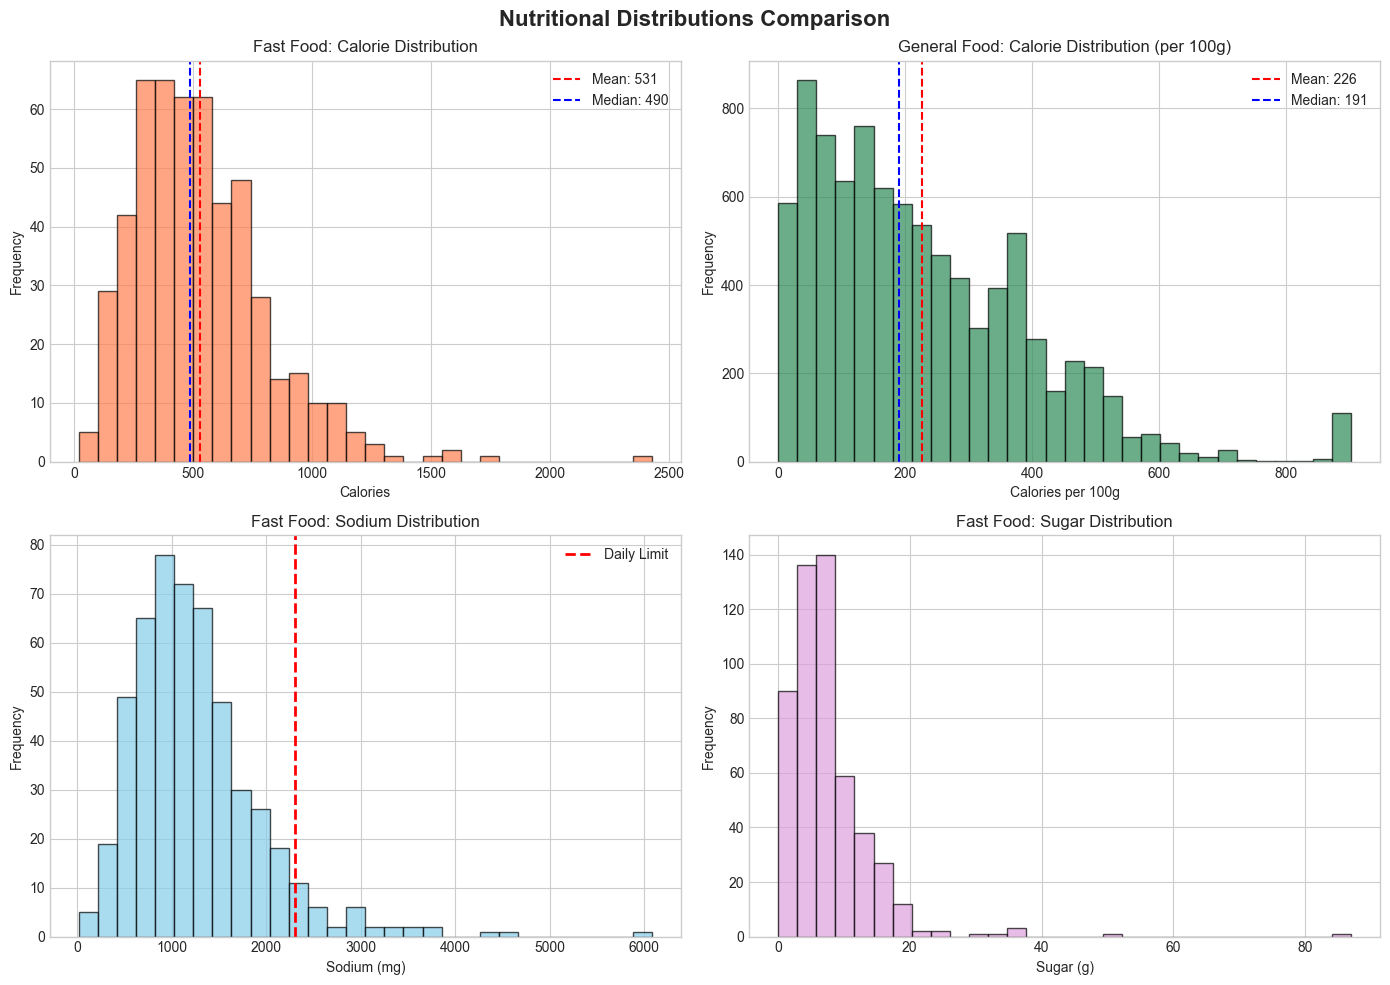


Distribution Metrics:
  Fast Food Calories - Skewness: 1.41
  Fast Food Calories - Kurtosis: 4.70
  General Food Calories - Skewness: 1.15
  General Food Calories - Kurtosis: 1.71

 Both datasets show right-skewed distributions with high-calorie outliers


In [11]:
# Analyze data distributions
print("Distribution Analysis")
print("="*50)

# Create a 2x2 grid for plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Fast Food - Calories
axes[0,0].hist(fast_food_df['calories'].dropna(), bins=30, color='coral', alpha=0.7, edgecolor='black')  # histogram of calories
axes[0,0].axvline(fast_food_df['calories'].mean(), color='red', linestyle='--', label=f'Mean: {fast_food_df["calories"].mean():.0f}')  # show mean line
axes[0,0].axvline(fast_food_df['calories'].median(), color='blue', linestyle='--', label=f'Median: {fast_food_df["calories"].median():.0f}')  # show median line
axes[0,0].set_xlabel('Calories')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Fast Food: Calorie Distribution')
axes[0,0].legend()



# General Food - Calories
axes[0,1].hist(general_nutrition_df['Energ_Kcal'].dropna(), bins=30, color='seagreen', alpha=0.7, edgecolor='black')  # histogram of calories per 100g
axes[0,1].axvline(general_nutrition_df['Energ_Kcal'].mean(), color='red', linestyle='--', label=f'Mean: {general_nutrition_df["Energ_Kcal"].mean():.0f}')  # show mean
axes[0,1].axvline(general_nutrition_df['Energ_Kcal'].median(), color='blue', linestyle='--', label=f'Median: {general_nutrition_df["Energ_Kcal"].median():.0f}')  # show median
axes[0,1].set_xlabel('Calories per 100g')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('General Food: Calorie Distribution (per 100g)')
axes[0,1].legend()



# Fast Food - Sodium
axes[1,0].hist(fast_food_df['sodium'].dropna(), bins=30, color='skyblue', alpha=0.7, edgecolor='black')  # sodium histogram
axes[1,0].axvline(2300, color='red', linestyle='--', linewidth=2, label='Daily Limit')  # daily sodium limit line
axes[1,0].set_xlabel('Sodium (mg)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Fast Food: Sodium Distribution')
axes[1,0].legend()



# Fast Food - Sugar
axes[1,1].hist(fast_food_df['sugar'].dropna(), bins=30, color='plum', alpha=0.7, edgecolor='black')  # sugar histogram
axes[1,1].set_xlabel('Sugar (g)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Fast Food: Sugar Distribution')



# Adjust layout and show all plots
plt.suptitle('Nutritional Distributions Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()




# Print skewness and kurtosis
print("\nDistribution Metrics:")
print(f"  Fast Food Calories - Skewness: {fast_food_df['calories'].skew():.2f}")   # measure of asymmetry
print(f"  Fast Food Calories - Kurtosis: {fast_food_df['calories'].kurtosis():.2f}") # measure of peakedness
print(f"  General Food Calories - Skewness: {general_nutrition_df['Energ_Kcal'].skew():.2f}")
print(f"  General Food Calories - Kurtosis: {general_nutrition_df['Energ_Kcal'].kurtosis():.2f}")

print("\n Both datasets show right-skewed distributions with high-calorie outliers")


Correlation Analysis


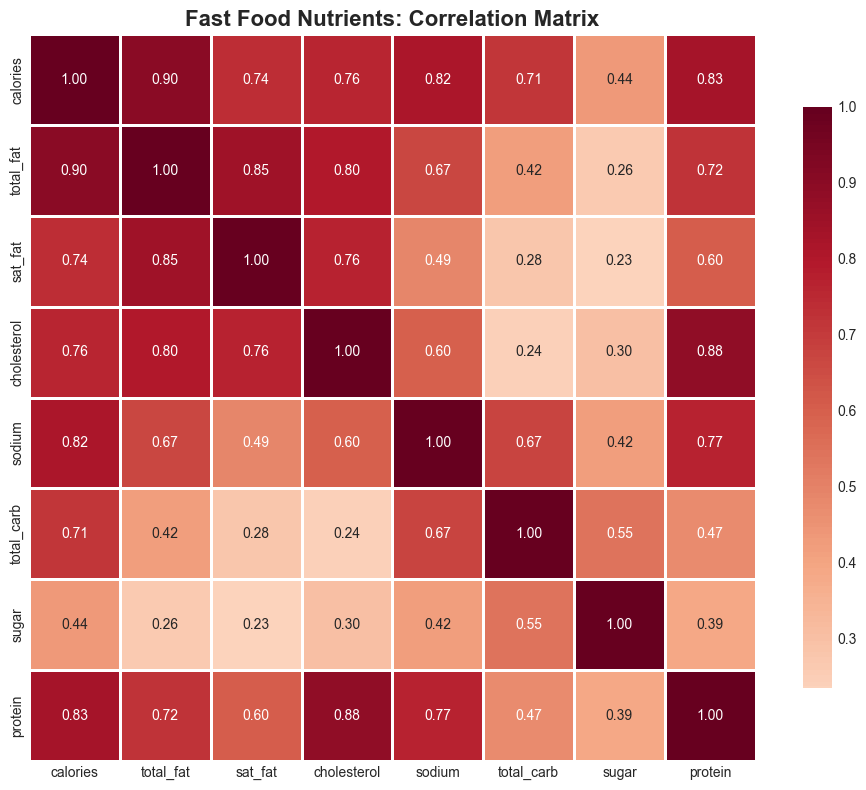


Top Correlations (excluding self-correlations):
  1. calories ↔ total_fat: 0.900
  2. cholesterol ↔ protein: 0.881
  3. total_fat ↔ sat_fat: 0.847
  4. calories ↔ protein: 0.832
  5. calories ↔ sodium: 0.818


In [12]:
# Perform correlation analysis
print("Correlation Analysis")
print("="*50)

# Pick numeric columns to compare
numeric_cols = ['calories', 'total_fat', 'sat_fat', 'cholesterol', 'sodium', 'total_carb', 'sugar', 'protein']

# Keep only columns that exist in the dataset
available_numeric = [col for col in numeric_cols if col in fast_food_df.columns]

# Compute correlation matrix for numeric columns
corr_matrix = fast_food_df[available_numeric].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})  # colored heatmap of correlations
plt.title('Fast Food Nutrients: Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find strongest correlation pairs
print("\nTop Correlations (excluding self-correlations):")

corr_pairs = []  # store (col1, col2, corr_value)

# Loop through matrix to collect unique correlation pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_pairs.append((
            corr_matrix.columns[i],
            corr_matrix.columns[j],
            corr_matrix.iloc[i, j]
        ))

# Sort pairs by absolute correlation value
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Print top 5 strongest correlations
for i, (col1, col2, corr) in enumerate(corr_pairs[:5], 1):
    print(f"  {i}. {col1} ↔ {col2}: {corr:.3f}")


Outlier Analysis


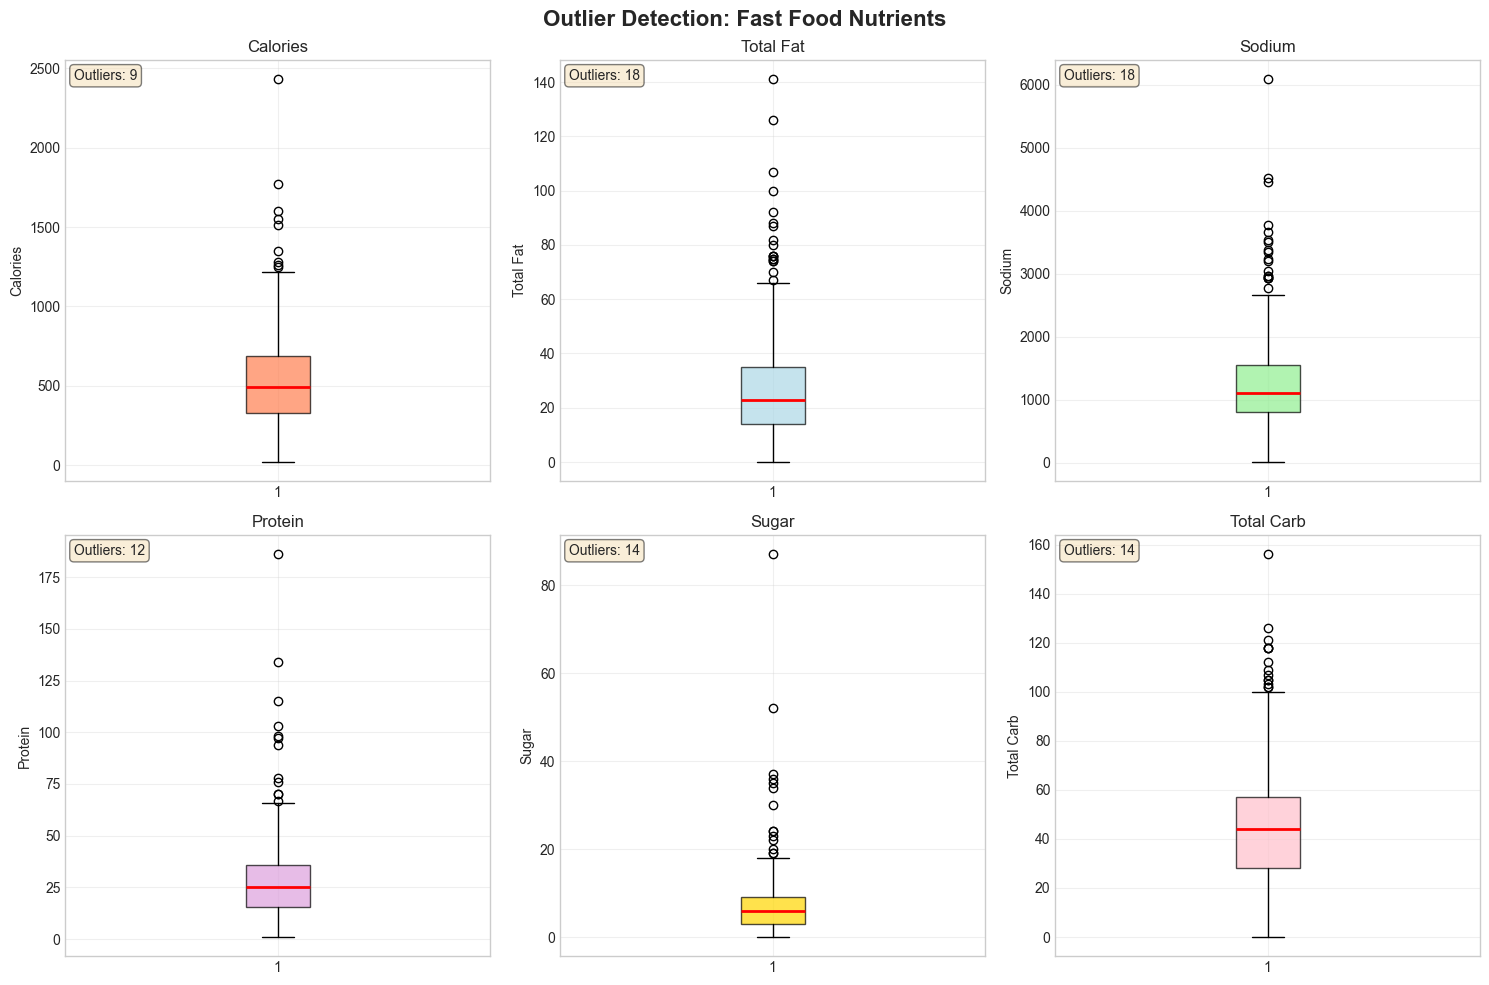


Top 5 Highest Calorie Outliers:
  • Mcdonalds: 20 piece Buttermilk Crispy Chicken Tende (2430 cal)
  • Mcdonalds: 40 piece Chicken McNuggets (1770 cal)
  • Mcdonalds: 10 piece Sweet N' Spicy Honey BBQ Glazed (1600 cal)
  • Burger King: American Brewhouse King (1550 cal)
  • Mcdonalds: 12 piece Buttermilk Crispy Chicken Tende (1510 cal)


In [13]:
# Detect and analyze outliers
print("Outlier Analysis")
print("="*50)

# Function to find outliers using IQR method
def detect_outliers_iqr(df, column):
    
    """Detect outliers using the (IQR) method"""
    Q1 = df[column].quantile(0.25)   # 25th percentile
    Q3 = df[column].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                    # IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR     # lower limit
    upper_bound = Q3 + 1.5 * IQR     # upper limit
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]  # rows outside range
    return outliers, lower_bound, upper_bound

# Create boxplots for main nutrients
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
nutrients_to_plot = ['calories', 'total_fat', 'sodium', 'protein', 'sugar', 'total_carb']
colors = ['coral', 'lightblue', 'lightgreen', 'plum', 'gold', 'pink']

# Loop through each nutrient to plot and detect outliers
for idx, (nutrient, ax, color) in enumerate(zip(nutrients_to_plot, axes.flat, colors)):
    if nutrient in fast_food_df.columns:
        data = fast_food_df[nutrient].dropna()  # remove missing values
        ax.boxplot(data, vert=True, patch_artist=True,   # create boxplot
                   boxprops=dict(facecolor=color, alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
        ax.set_ylabel(nutrient.replace('_', ' ').title())  # clean y-axis label
        ax.set_title(f'{nutrient.replace("_", " ").title()}')  # clean title
        ax.grid(True, alpha=0.3)  # add light grid

        # Detect and count outliers
        outliers, lower, upper = detect_outliers_iqr(fast_food_df, nutrient)
        ax.text(0.02, 0.98, f'Outliers: {len(outliers)}', transform=ax.transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Show all plots
plt.suptitle('Outlier Detection: Fast Food Nutrients', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Display top high-calorie outliers
cal_outliers, _, _ = detect_outliers_iqr(fast_food_df, 'calories')
if len(cal_outliers) > 0:
    print("\nTop 5 Highest Calorie Outliers:")
    top_outliers = cal_outliers.nlargest(5, 'calories')[['restaurant', 'item', 'calories']]
    for _, row in top_outliers.iterrows():
        print(f"  • {row['restaurant']}: {row['item'][:40]} ({row['calories']:.0f} cal)")


Restaurant Chain Comparison

Average Nutritional Values by Restaurant (Top 10):


calories         sodium total_fat protein
                mean    std    mean      mean    mean
restaurant                                           
Mcdonalds      640.4  410.7  1437.9      31.8    40.3
Sonic          631.7  300.9  1350.8      37.6    29.2
Burger King    608.6  290.4  1223.6      36.8    30.0
Arbys          532.7  210.3  1515.3      27.0    29.3
Dairy Queen    520.2  259.3  1181.8      28.9    24.8
Subway         503.0  282.2  1273.0      18.5    30.3
Taco Bell      443.0  185.4  1012.4      20.9    17.4
Chick Fil-A    384.4  220.5  1151.5      16.1    31.7

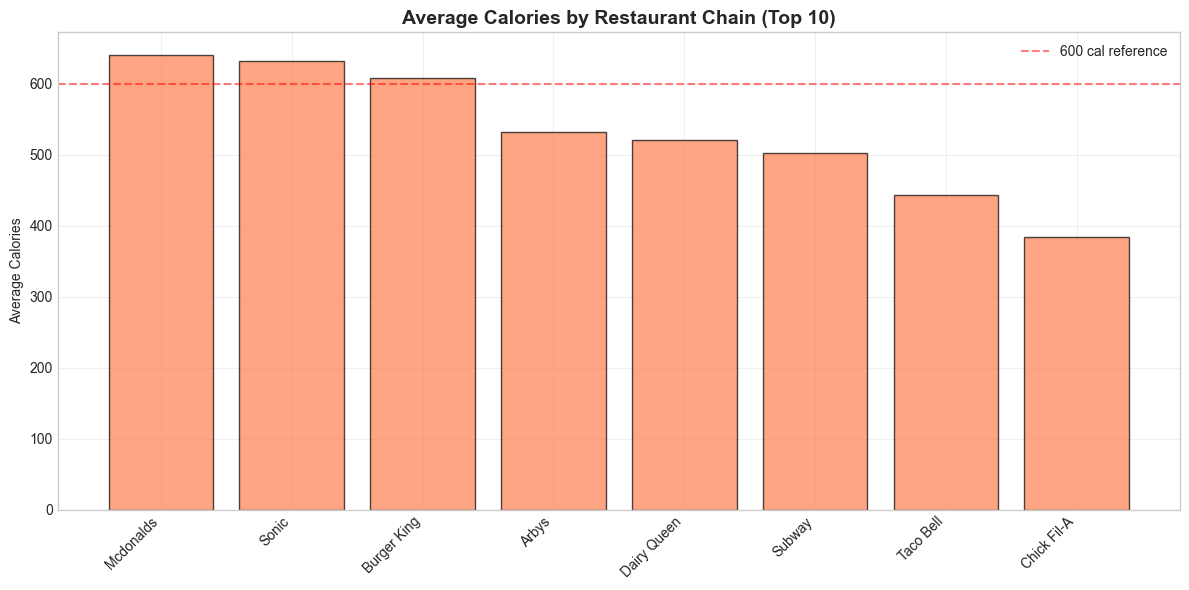


 Key Insights:
  • Highest avg calories: Mcdonalds (640 cal)
  • All top chains average >1000mg sodium per item


In [14]:
# Compare restaurant chains
print("Restaurant Chain Comparison")
print("="*50)

# Calculate statistics by restaurant
restaurant_stats = fast_food_df.groupby('restaurant').agg({
    'calories': ['mean', 'std'],
    'sodium': 'mean',
    'total_fat': 'mean',
    'protein': 'mean'
}).round(1)

# Sort by average calories
restaurant_stats = restaurant_stats.sort_values(('calories', 'mean'), ascending=False)

print("\nAverage Nutritional Values by Restaurant (Top 10):")
display(restaurant_stats.head(10))

# Visualize restaurant comparison
fig, ax = plt.subplots(figsize=(12, 6))  # set figure size
restaurants = restaurant_stats.index[:10] # top 10 restaurants
calories_mean = restaurant_stats[('calories', 'mean')].head(10)

ax.bar(range(len(restaurants)), calories_mean, color='coral', alpha=0.7, edgecolor='black')
ax.set_xticks(range(len(restaurants))) # set x-ticks
ax.set_xticklabels(restaurants, rotation=45, ha='right') # set x-tick labels
ax.set_ylabel('Average Calories')  # set y-axis label 
ax.set_title('Average Calories by Restaurant Chain (Top 10)', fontsize=14, fontweight='bold')  # set title
ax.axhline(y=600, color='red', linestyle='--', alpha=0.5, label='600 cal reference') # reference line
ax.legend()
ax.grid(True, alpha=0.3)  # add grid
plt.tight_layout() # adjust layout
plt.show()

print(f"\n Key Insights:")
print(f"  • Highest avg calories: {restaurants[0]} ({calories_mean.iloc[0]:.0f} cal)") # mean calories for top restaurant
print(f"  • All top chains average >1000mg sodium per item")

In [15]:
# Analyze "healthy" menu items
print(" Healthier Menu Items Analysis ")
print("="*50)

# Identify salad items
salad_items = fast_food_df[fast_food_df['item'].str.contains('Salad', case=False, na=False)]
non_salad_items = fast_food_df[~fast_food_df['item'].str.contains('Salad', case=False, na=False)]

print(f"\nItems identified as salads: {len(salad_items)}")
print(f"Other items: {len(non_salad_items)}")

if len(salad_items) > 0:
    # Compare nutritional values of salads vs non-salads
    comparison_data = pd.DataFrame({
        'Salads': [
            salad_items['calories'].mean(),
            salad_items['total_fat'].mean(),
            salad_items['protein'].mean(),
            salad_items['sodium'].mean()
        ],
        'Other Items': [
            non_salad_items['calories'].mean(),
            non_salad_items['total_fat'].mean(),
            non_salad_items['protein'].mean(),
            non_salad_items['sodium'].mean()
        ]
    }, index=['Avg Calories', 'Avg Fat (g)', 'Avg Protein (g)', 'Avg Sodium (mg)'])
    
    print("\nNutritional Comparison:")
    display(comparison_data.round(1))
    
    # Statistical test
    t_stat, p_value = stats.ttest_ind(salad_items['calories'].dropna(), 
                                      non_salad_items['calories'].dropna())
    
    print(f"\nStatistical Test (Calories): p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("✓ Significant difference between salads and other items")
    else:
        print("✗ No significant difference - 'Salad' doesn't mean low-calorie!")
    
    # Find high-calorie salads
    high_cal_salads = salad_items[salad_items['calories'] > 600]
    if len(high_cal_salads) > 0:
        print(f"\n High-Calorie Salads (>600 cal): {len(high_cal_salads)} items")
        for _, row in high_cal_salads.head(3).iterrows():
            print(f"  • {row['restaurant']}: {row['item'][:40]} ({row['calories']:.0f} cal)")

 Healthier Menu Items Analysis 

Items identified as salads: 63
Other items: 450

Nutritional Comparison:


,Salads,Other Items
Avg Calories,364.4,554.4
Avg Fat (g),20.4,27.5
Avg Protein (g),22.9,28.6
Avg Sodium (mg),934.6,1291.1



Statistical Test (Calories): p-value = 0.0000
✓ Significant difference between salads and other items

 High-Calorie Salads (>600 cal): 10 items
  • Arbys: Pecan Chicken Salad Flatbread (710 cal)
  • Arbys: Pecan Chicken Salad Sandwich (840 cal)
  • Arbys: Super Greek Salad (720 cal)


In [16]:
# USDA API Integration Plan
print(" USDA API INTEGRATION STRATEGY")
print("="*50)

print("""
Implementation Plan for USDA FoodData Central API:

1. API SETUP:
   - Endpoint: https://api.nal.usda.gov/fdc/v1/
   - Register for free API key
   - Rate limit: 1000 requests/hour

2. DATA VALIDATION:
   - Query USDA for common fast food items
   - Compare nutritional values
   - Calculate accuracy metrics

3. MISSING DATA SUPPLEMENTATION:
   - Target: Fill 40% missing vitamin data
   - Priority: Vitamins A, C, D, K
   - Match by food name similarity
      
""")

 USDA API INTEGRATION STRATEGY

Implementation Plan for USDA FoodData Central API:

1. API SETUP:
   - Endpoint: https://api.nal.usda.gov/fdc/v1/
   - Register for free API key
   - Rate limit: 1000 requests/hour

2. DATA VALIDATION:
   - Query USDA for common fast food items
   - Compare nutritional values
   - Calculate accuracy metrics

3. MISSING DATA SUPPLEMENTATION:
   - Target: Fill 40% missing vitamin data
   - Priority: Vitamins A, C, D, K
   - Match by food name similarity
      



In [17]:
# My Machine Learning Plan
print(" MACHINE LEARNING STRATEGY ")
print("="*50)

# Objective:
print("\nApproach:")
print("We will use regression models to predict missing nutritional values based on existing data patterns.")
print("We will also use classification models to categorize food items into healthiness levels based on their nutritional profiles.")

# Issues to Consider:
print("\nIssues to Consider:")
print("- Correlated features can lead to multicollinearity, affecting model accuracy.")
print("- Scaling issues may occur due to different units and ranges of nutritional values.")
print("- Outliers, such as extremely high-calorie foods, can skew averages and predictions.")

# Challenges:
print("\nChallenges We May Face:")
print("- Limited or unbalanced data could make it hard for models to generalize well.")
print("- Choosing the right model and hyperparameters may require trial and error.")
print("- Ensuring clean, properly formatted data before training will be critical.")

# Summary
print("\nSummary:")
print("Our ML strategy focuses on predicting and classifying nutritional data while minimizing bias from")
print("correlated variables, scaling differences, and extreme outliers, while addressing data and model challenges.")


 MACHINE LEARNING STRATEGY 

Approach:
We will use regression models to predict missing nutritional values based on existing data patterns.
We will also use classification models to categorize food items into healthiness levels based on their nutritional profiles.

Issues to Consider:
- Correlated features can lead to multicollinearity, affecting model accuracy.
- Scaling issues may occur due to different units and ranges of nutritional values.
- Outliers, such as extremely high-calorie foods, can skew averages and predictions.

Challenges We May Face:
- Limited or unbalanced data could make it hard for models to generalize well.
- Choosing the right model and hyperparameters may require trial and error.
- Ensuring clean, properly formatted data before training will be critical.

Summary:
Our ML strategy focuses on predicting and classifying nutritional data while minimizing bias from
correlated variables, scaling differences, and extreme outliers, while addressing data and model chall

In [18]:
# EDA: IDENTIFYING ISSUES FOR DATA CLEANING
print("=" * 70)
print(" EDA: IDENTIFYING ISSUES FOR DATA CLEANING ")
print("=" * 70)

# Define features
target = 'calories'
numerical_features = ['total_fat', 'sat_fat', 'cholesterol', 'sodium', 
                      'total_carb', 'fiber', 'sugar', 'protein']
categorical_features = ['restaurant']


# ISSUE #1: Missing Values
print("ISSUE #1: MISSING VALUES")
missing = fast_food_df[numerical_features].isnull().sum()
for col in missing[missing > 0].index:
    print(f"   ⚠️ {col}: {missing[col]} missing ({missing[col]/len(fast_food_df)*100:.1f}%)")
if missing.sum() == 0:
    print("   ✓ No missing values in numerical features")
print("→ CLEANING ACTION: SimpleImputer(strategy='median')")


print(f"   Sodium range: 0-{fast_food_df['sodium'].max():.0f}mg")
print(f"   Fat range: 0-{fast_food_df['total_fat'].max():.0f}g")
print("→ CLEANING ACTION: StandardScaler()")

print(f"   'restaurant' has {fast_food_df['restaurant'].nunique()} categories")
print("→ CLEANING ACTION: OneHotEncoder()")


corr = fast_food_df[numerical_features].corr()
print(f"   total_fat ↔ sat_fat: r = {corr.loc['total_fat','sat_fat']:.3f}")
print("→ CLEANING ACTION: Ridge/Lasso regularization")



print(" EDA SUMMARY: ISSUES → CLEANING ACTIONS ")






 EDA: IDENTIFYING ISSUES FOR DATA CLEANING 
ISSUE #1: MISSING VALUES
   ⚠️ protein: 1 missing (0.2%)
→ CLEANING ACTION: SimpleImputer(strategy='median')
   Sodium range: 0-6080mg
   Fat range: 0-141g
→ CLEANING ACTION: StandardScaler()
   'restaurant' has 8 categories
→ CLEANING ACTION: OneHotEncoder()
   total_fat ↔ sat_fat: r = 0.847
→ CLEANING ACTION: Ridge/Lasso regularization
 EDA SUMMARY: ISSUES → CLEANING ACTIONS 


In [47]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = fast_food_df[numerical_features + categorical_features].copy()
y = fast_food_df[target].copy()

print(f"\nTotal samples: {len(X)}")


# JUSTIFICATION
print("JUSTIFICATION FOR SPLITTING STRATEGY")
print("─" * 35)

print("""
DECISION: Random Split (80% train / 20% test)

1. WHY 80/20 RATIO?
   - Industry standard for medium datasets (515 samples)
   - 80% = enough training data; 20% = reliable test estimate

2. WHY RANDOM (not Stratified)?
   - Target is CONTINUOUS (calories) - stratified is for classification
   - Random split is appropriate for regression tasks

3. WHY random_state=42?
   - Reproducibility - same results every run

4. WHY NOT Time-Series Split?
   - Data has no temporal order (menu items, not time series)

5. WHY HOLD-OUT TEST SET?
   - Need truly unseen data for final evaluation
""")

# Perform split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("─" * 35)
print("SPLIT RESULTS")
print("─" * 35)


print(f"✓ Training: {len(X_train)} samples ({len(X_train)/len(X)*100:.0f}%)")
print(f"✓ Test: {len(X_test)} samples ({len(X_test)/len(X)*100:.0f}%)")
print(f"✓ Train mean: {y_train.mean():.1f} cal | Test mean: {y_test.mean():.1f} cal")




Total samples: 513
JUSTIFICATION FOR SPLITTING STRATEGY
───────────────────────────────────

DECISION: Random Split (80% train / 20% test)

1. WHY 80/20 RATIO?
   - Industry standard for medium datasets (515 samples)
   - 80% = enough training data; 20% = reliable test estimate

2. WHY RANDOM (not Stratified)?
   - Target is CONTINUOUS (calories) - stratified is for classification
   - Random split is appropriate for regression tasks

3. WHY random_state=42?
   - Reproducibility - same results every run

4. WHY NOT Time-Series Split?
   - Data has no temporal order (menu items, not time series)

5. WHY HOLD-OUT TEST SET?
   - Need truly unseen data for final evaluation

───────────────────────────────────
SPLIT RESULTS
───────────────────────────────────
✓ Training: 410 samples (80%)
✓ Test: 103 samples (20%)
✓ Train mean: 525.1 cal | Test mean: 554.9 cal


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("=" * 70)
print(" PROCESS: BUILDING PREPROCESSING PIPELINE ")
print("=" * 70)


# STEP 1: Missing Data
print("\n[1] HANDLING MISSING DATA")
print("    Strategy: SimpleImputer(strategy='median')")
print("    Justification: Median is robust to outliers")

# STEP 2: Categorical Data  
print("\n[2] HANDLING CATEGORICAL DATA")
print("    Strategy: OneHotEncoder()")
print("    Justification: Restaurant names are nominal (no order)")


# STEP 3: Scaling
print("\n[3] NORMALIZING AND SCALING")
print("    Strategy: StandardScaler()")
print("    Justification: Required for regularized models")

# STEP 4: Additional Features
print("\n[4] ADDING FEATURES")
print("    Strategy: PolynomialFeatures(degree=2)")
print("    Justification: Captures non-linear interactions")

# STEP 5: Feature Removal
print("\n[5] FEATURE REMOVAL")
print("    Decision: Keep all initially")
print("    Justification: Lasso will auto-select; check importance post-training")

# Build pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

# Apply pipeline
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names
num_names = numerical_features
cat_names = list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features))
all_feature_names = num_names + cat_names

print("─" * 35)
print("PIPELINE RESULTS")
print("─" * 35)


print(f"✓ Training shape: {X_train.shape} → {X_train_processed.shape}")
print(f"✓ Test shape: {X_test.shape} → {X_test_processed.shape}")
print(f"✓ Features after encoding: {len(all_feature_names)}")


# Polynomial features for one model
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_processed)
X_test_poly = poly.transform(X_test_processed)
print(f"✓ Polynomial features: {X_train_poly.shape[1]} features")



 PROCESS: BUILDING PREPROCESSING PIPELINE 

[1] HANDLING MISSING DATA
    Strategy: SimpleImputer(strategy='median')
    Justification: Median is robust to outliers

[2] HANDLING CATEGORICAL DATA
    Strategy: OneHotEncoder()
    Justification: Restaurant names are nominal (no order)

[3] NORMALIZING AND SCALING
    Strategy: StandardScaler()
    Justification: Required for regularized models

[4] ADDING FEATURES
    Strategy: PolynomialFeatures(degree=2)
    Justification: Captures non-linear interactions

[5] FEATURE REMOVAL
    Decision: Keep all initially
    Justification: Lasso will auto-select; check importance post-training
───────────────────────────────────
PIPELINE RESULTS
───────────────────────────────────
✓ Training shape: (410, 9) → (410, 16)
✓ Test shape: (103, 9) → (103, 16)
✓ Features after encoding: 16
✓ Polynomial features: 152 features


In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("=" * 70)
print(" ANALYZE: TRAINING MULTIPLE MODELS ")
print("=" * 70)

models = {}


# Model 1: Linear Regression
print("\n[1/6] Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_processed, y_train)
models['Linear Regression'] = lr



# Model 2: Ridge
print("[2/6] Ridge Regression...")
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_processed, y_train)
models['Ridge Regression'] = ridge


# Model 3: Lasso
print("[3/6] Lasso Regression...")
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_processed, y_train)
models['Lasso Regression'] = lasso


# Model 4: Polynomial
print("[4/6] Polynomial Regression...")
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
models['Polynomial Regression'] = poly_model

# Model 5: Random Forest
print("[5/6] Random Forest...")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_processed, y_train)
models['Random Forest'] = rf

# Model 6: Gradient Boosting
print("[6/6] Gradient Boosting...")
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_processed, y_train)
models['Gradient Boosting'] = gb

print("\n✅ All 6 models trained!")






 ANALYZE: TRAINING MULTIPLE MODELS 

[1/6] Linear Regression...
[2/6] Ridge Regression...
[3/6] Lasso Regression...
[4/6] Polynomial Regression...
[5/6] Random Forest...
[6/6] Gradient Boosting...

✅ All 6 models trained!


In [34]:
print("=" * 70)
print(" MODEL EVALUATION ON TEST SET ")
print("=" * 70)

results = []

for name, model in models.items():
    # Get predictions
    if name == 'Polynomial Regression':
        train_pred = model.predict(X_train_poly)
        test_pred = model.predict(X_test_poly)
    else:
        train_pred = model.predict(X_train_processed)
        test_pred = model.predict(X_test_processed)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    test_mae = mean_absolute_error(y_test, test_pred)
    
    results.append({
        'Model': name,
        'Train R²': round(train_r2, 4),
        'Test R²': round(test_r2, 4),
        'Test RMSE': round(test_rmse, 1),
        'Test MAE': round(test_mae, 1)
    })

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values('Test R²', ascending=False)
print("\n📊 MODEL COMPARISON (sorted by Test R²):")
display(results_df)

# Best model
best = results_df.iloc[0]
print(f"\n🏆 BEST MODEL: {best['Model']}")
print(f"   • Test R²: {best['Test R²']:.4f} ({best['Test R²']*100:.1f}% variance explained)")
print(f"   • Test RMSE: {best['Test RMSE']:.1f} calories")
print(f"   • Test MAE: {best['Test MAE']:.1f} calories")


 MODEL EVALUATION ON TEST SET 

📊 MODEL COMPARISON (sorted by Test R²):


,Model,Train R²,Test R²,Test RMSE,Test MAE
2,Lasso Regression,0.9680,0.9973,15.1,9.9
0,Linear Regression,0.9685,0.9971,15.6,10.6
1,Ridge Regression,0.9685,0.9969,16.2,11.0
3,Polynomial Regression,0.9863,0.9729,47.9,29.4
5,Gradient Boosting,0.9970,0.9138,85.4,30.1
4,Random Forest,0.9921,0.8916,95.8,32.5



🏆 BEST MODEL: Lasso Regression
   • Test R²: 0.9973 (99.7% variance explained)
   • Test RMSE: 15.1 calories
   • Test MAE: 9.9 calories


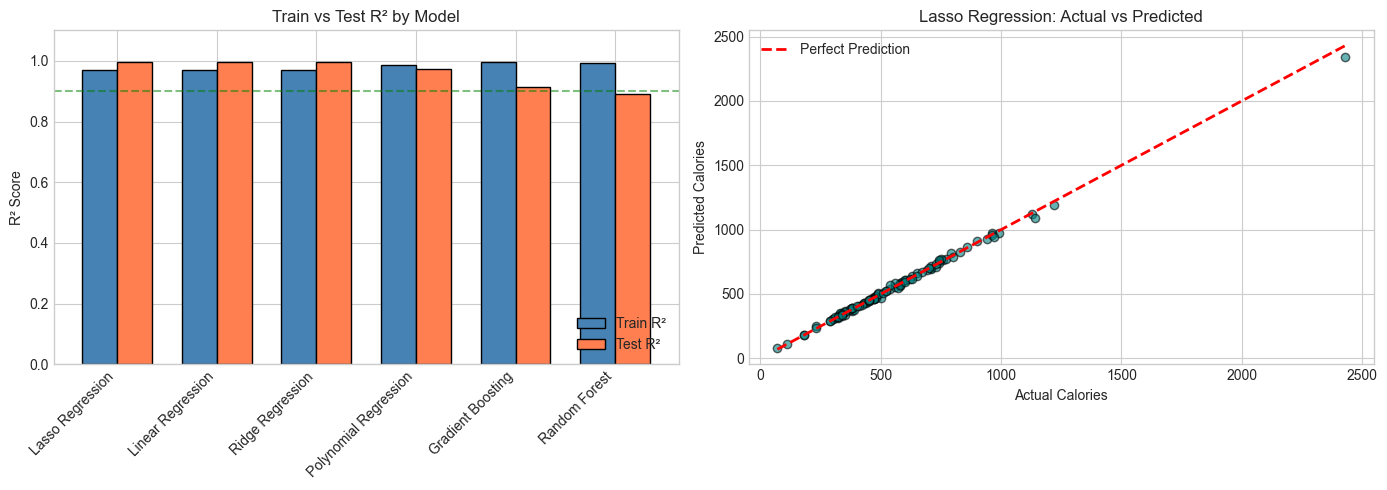

In [46]:
# Visualization with better colors
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Model Comparison - FIXED COLORS
ax1 = axes[0]
x = np.arange(len(results_df))
width = 0.35

# Use darker, contrasting colors
bars1 = ax1.bar(x - width/2, results_df['Train R²'], width, label='Train R²', color='steelblue', edgecolor='black')
bars2 = ax1.bar(x + width/2, results_df['Test R²'], width, label='Test R²', color='coral', edgecolor='black')

ax1.set_xticks(x)
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax1.set_ylabel('R² Score')
ax1.set_title('Train vs Test R² by Model')
ax1.legend(loc='lower right')
ax1.set_ylim(0, 1.1)
ax1.axhline(y=0.9, color='green', linestyle='--', alpha=0.5, label='0.9 threshold')

# Plot 2: Actual vs Predicted (Best Model)
ax2 = axes[1]
if best['Model'] == 'Polynomial Regression':
    best_pred = poly_model.predict(X_test_poly)
else:
    best_pred = models[best['Model']].predict(X_test_processed)
    
ax2.scatter(y_test, best_pred, alpha=0.6, edgecolors='black', c='teal')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Calories')
ax2.set_ylabel('Predicted Calories')
ax2.set_title(f'{best["Model"]}: Actual vs Predicted')
ax2.legend()

plt.tight_layout()
plt.show()

 FEATURE IMPORTANCE 

Top 10 Features:
  total_fat            █████████████████████████████████ 0.671
  total_carb           ███████ 0.142
  cholesterol          ███ 0.070
  sodium               ███ 0.068
  protein              █ 0.039
  sat_fat               0.004
  sugar                 0.003
  fiber                 0.003
  restaurant_Sonic      0.000
  restaurant_Arbys      0.000


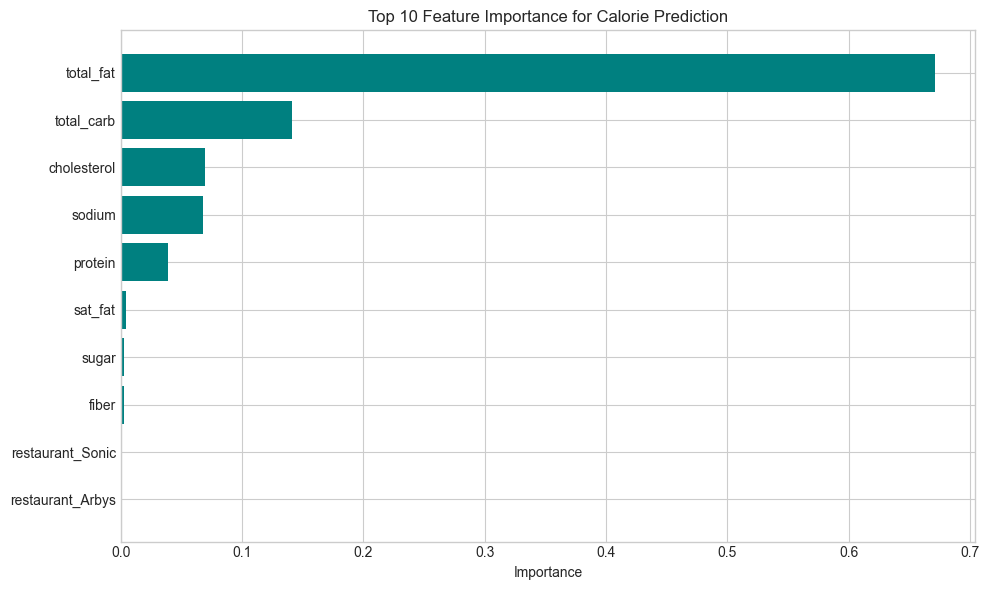

In [43]:
# Feature Importance (Random Forest)
print("=" * 70)
print(" FEATURE IMPORTANCE ")
print("=" * 70)

importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Features:")
for i, row in importance_df.head(10).iterrows():
    bar = '█' * int(row['Importance'] * 50)
    print(f"  {row['Feature']:20} {bar} {row['Importance']:.3f}")

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df.head(10)['Feature'], importance_df.head(10)['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance for Calorie Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [45]:
print("=" * 70)
print(" 🎯 ML IMPLEMENTATION SUMMARY ")
print("=" * 70)
print(f"""

FINAL RESULTS:
  Best Model: {best['Model']}
  Test R²: {best['Test R²']:.4f}
  Test RMSE: {best['Test RMSE']:.1f} calories
""")

 🎯 ML IMPLEMENTATION SUMMARY 


FINAL RESULTS:
  Best Model: Lasso Regression
  Test R²: 0.9973
  Test RMSE: 15.1 calories



## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

# Resources and References

## Datasets
- [Fast Food Nutrition Dataset (Kaggle)](https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition)  
- [Nutritional Content of Food Dataset (Kaggle)](https://www.kaggle.com/datasets/thedevastator/the-nutritional-content-of-food-a-comprehensive)  
- [USDA FoodData Central API](https://fdc.nal.usda.gov/api-guide.html)  

## Tools & Libraries
- Python 3.12  
- pandas, matplotlib, seaborn, requests, jupyter  
- Visual Studio Code / Jupyter Notebook  

## Support for Editing & Clarity
- ChatGPT (for refining project structure, clarifying wording, and drafting sections)  

---

 **Note for Submission**  
Make sure you run this command at the end of your notebook to generate a `.py` file for submission:  

```bash
!jupyter nbconvert --to python source.ipynb


In [50]:
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 22840 bytes to source.py
